In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [298]:
data = pd.read_csv("./data/planets_2019.11.01_20.07.23.csv")

In [61]:
defs = pd.read_csv("./data/planets_2019.11.01_20.07.23__column_definitions_clean.csv")

In [301]:
np.unique(data.pl_pnum.values)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [80]:
data.columns.values

array(['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2',
       'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes',
       'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1',
       'st_disterr2', 'st_distlim', 'gaia_dist', 'gaia_disterr1',
       'gaia_disterr2', 'gaia_distlim', 'st_optmag', 'st_optmagerr',
       'st_optmaglim', 'st_optband', 'gaia_gmag', 'gaia_gmagerr',
       'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_teff

In [70]:
data.columns.values

array(['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2',
       'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes',
       'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1',
       'st_disterr2', 'st_distlim', 'gaia_dist', 'gaia_disterr1',
       'gaia_disterr2', 'gaia_distlim', 'st_optmag', 'st_optmagerr',
       'st_optmaglim', 'st_optband', 'gaia_gmag', 'gaia_gmagerr',
       'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_teff

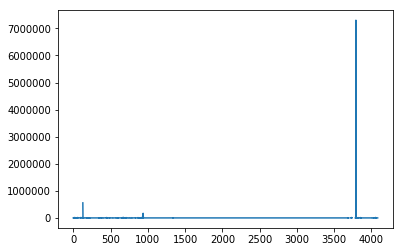

In [72]:
plt.plot(data.pl_orbper)

(array([ 178.,  172.,  144.,  174.,  188.,  200.,  136.,  924., 1768.,
         200.]),
 array([3.25750000e-01, 3.62906054e+01, 7.22554608e+01, 1.08220316e+02,
        1.44185172e+02, 1.80150027e+02, 2.16114882e+02, 2.52079738e+02,
        2.88044593e+02, 3.24009449e+02, 3.59974304e+02]),
 <a list of 10 Patch objects>)

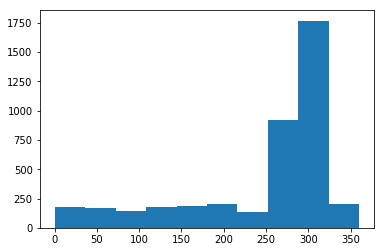

In [46]:
plt.hist(data.ra.values)

(array([  37.,  129.,  149.,  345.,  365.,  288.,  226., 2453.,   68.,
          24.]),
 array([-84.231613 , -67.2348364, -50.2380598, -33.2412832, -16.2445066,
          0.75227  ,  17.7490466,  34.7458232,  51.7425998,  68.7393764,
         85.736153 ]),
 <a list of 10 Patch objects>)

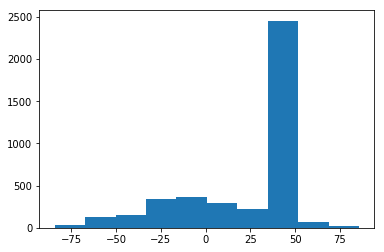

In [47]:
plt.hist(data.dec.values)

# Test making a planetary orbit

In [86]:
test_T = data.pl_orbper.values[0]
test_a = data.pl_orbsmax.values[0]
test_e = data.pl_orbeccen.values[0]

Definition of the ellipse

In [85]:
def r(th, a, e):
    num = a*(1-e**2)
    den = 1 + e*np.cos(th)
    return num/den

I think this is wrong, the orbital velocity should change with time probably, so it moves more quickly when close to the other gravitational object.

In [113]:
t = np.linspace(0, test_T*2*np.pi, 100)
th = t/test_T

In [114]:
radius = r(th, test_a, test_e)

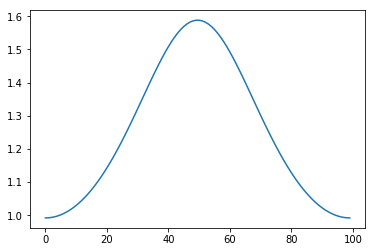

In [115]:
plt.plot(radius)

In [119]:
x = radius*np.cos(th)
y = radius*np.sin(th)

In [118]:
from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')

[(-1.2546358635439625, 1.2546358635439625), (-1.5869505139531341, 0.99201)]

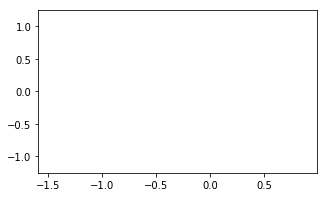

In [123]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))

In [128]:
orbit_line = ax.plot(x, y, 'k--')[0]
orbit_planet = ax.plot(x[0], y[0], 'ro', markersize=5)[0]

In [ ]:
orbit_planet.set

In [129]:
def animate(i):
    orbit_planet.set_xdata(x[i])
    orbit_planet.set_ydata(y[i])

In [130]:
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1
)
 
plt.draw()
plt.show()

<Figure size 432x288 with 0 Axes>

Very wrong

In [131]:
anim.save("test.mp4")

# Trying to plot orbits with `rebound` nbody code

In [137]:
import rebound

In [157]:
data.pl_orbsmax[data.pl_pnum.values > 2]

20       2.100000
21       3.600000
22      11.600000
25       0.115227
26       0.241376
27       5.503000
28       0.015440
29       0.788000
31       0.050201
32       0.217500
33       0.476000
105           NaN
139      0.060700
140      0.125400
141      1.030400
150      0.019700
151      0.057000
152      0.698000
156      0.143390
157      0.361750
158      0.193940
159      0.082080
165      0.035000
166      0.061000
167      0.204000
181      0.040610
182      0.072100
183      0.028150
186      0.050500
187      0.125000
          ...    
3831     0.047200
3832     0.073300
3833     0.011110
3834     0.015210
3835     0.021440
3836     0.028170
3837     0.037100
3838     0.045100
3839          NaN
3857     0.168800
3858     0.082500
3859     0.108300
3860     0.308000
3967          NaN
3968     1.393000
3969          NaN
3970          NaN
4032     0.037500
4033     0.089000
4034     0.470000
4044     0.015570
4045     0.020900
4046     0.027640
4075     0.538000
4076     1

In [146]:
ind_planets = data.pl_hostname.values == "55 Cnc"

In [217]:
mass_planets = data.pl_bmassj.values[ind_planets]
a_planets = data.pl_orbsmax.values[ind_planets]
e_planets = data.pl_orbeccen.values[ind_planets]
p_planets = data.pl_orbper.values[ind_planets]
i_planets = data.pl_orbincl.values[ind_planets]
mass_star = data.st_mass.values[ind_planets][0]

In [218]:
from astropy import units,constants

In [219]:
stellar_over_jupiter = constants.M_sun.value/constants.M_jup.value

In [220]:
mass_planets = mass_planets/stellar_over_jupiter

In [221]:
# Make simulation
sim = rebound.Simulation()
# Add the star
sim.add(m=mass_star)
# Add the planets
for mass,a,e,p,i in zip(mass_planets, a_planets, e_planets, p_planets, i_planets):
    sim.add(primary=sim.particles[0],m=mass, e=e, a=a, inc=i)

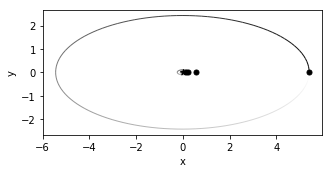

In [238]:
fig, ax = rebound.OrbitPlot(sim)

In [233]:
from plotly.tools import mpl_to_plotly

In [234]:
test = mpl_to_plotly(fig)

/home/marcus/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:451: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [223]:
test_string = "0.5, 0.1, 1.000, 1000.0, 100"

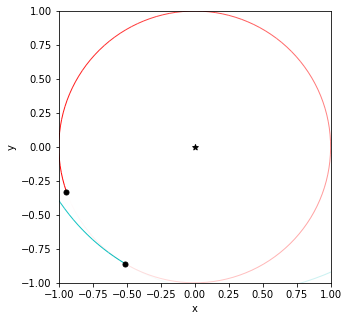

In [309]:
stellar_mass = 10000000
planet_mass = [1,2]
semi_major_axis = [1,2]
eccentricity = [0,0.5]

sim = rebound.Simulation()

# Add in stellar information
sim.add(m=stellar_mass)
for mass, a, e in zip(planet_mass, semi_major_axis, eccentricity):
    omega = np.random.random(1)[0]*2*np.pi
    sim.add(primary=sim.particles[0], m=mass, a=a, e=e, omega=omega)
    
fig, ax = rebound.OrbitPlot(sim,xlim=[-1,1],ylim=[-1,1], color=True)

In [306]:
sim.particles[1]

<rebound.Particle object, m=1.0 x=0.9091581673682699 y=-0.41645098956248006 z=0.0 vx=0.5889506375029556 vy=1.2857438106344756 vz=0.0>

In [314]:
sim.particles[1].x

-0.944123896407597

In [310]:
for particle in sim.particles:
    print(particle["x"])

TypeError: 'Particle' object is not subscriptable

In [255]:
np.random.random(1)[0]*np.pi

3.066605276882238

In [139]:
sim.add?